In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size': 16}
matplotlib.rc('font', **font)

In this document we will describe the difference between convex/concave, and show how to test if a function is convex/concave for single and multivariable functions.

# Convex

A real-valued function on an _n_-dimensional interval is called **convex** (or **convex downward** or **concave upward**) if the line segment between any two points on the graph of the function lies above or on the graph, in a Euclidean space (or more generally a vector space) of at least two dimensions.

![convex](convex.png)

Convex functions play an important role in many areas of mathematics. They are especially important in the study of optimization problems where they are distinguished by a number of convenient properties. For instance, a (strictly) convex function on an open set has no more than one minimum. Even in infinite-dimensioinal space, under suitable additional hypotheses, convex functions continue to satisfy such properties.

![convex set](convex-set.png)

A function (in black) is convex if and only if the region above its graph (in green) is a **convex set**. A convex set is a collection of points such that, for each pair of points in the collection, the entire line segment joining these two points is also in the collection.

# Concave

A set that is not convex is a called a _non-convex set_. A polygon that is not a convex polygon is sometimes called a concave polygon, and some sources more generally use the term _concave set_ to mean a non-convex set, but most authorities prohibit this usage.

The complement of a convex set, such as the epigraph of a concave function, is sometimes called a _reverse convex set_, expecially in the context of mathematical optimization.

# Single variable convexity/concavity test

Let $f$ be any single variable function. We can test if $f$ is concave/convex by finding the second derivative of $f$, and testing the following three cases:

 * $f''(x) > 0 \rightarrow f$ is convex at $x$.
 * $f''(x) < 0 \rightarrow f$ is concave at $x$.
 * $f''(x) = 0 \rightarrow f$ has an inflection point at $x$.
 
The inflection point determines when the function convexity/concavity of $f$ changes.
 
## Example

Let $f(x)=5x^3 + 4x^2 + 6x$. If we differentiate $f$, we get $f'(x)=15x^2+8x+6$. Differentiating again, for the second derivative, we get $f''(x)=30x+8$. If we plot $f(x)$ and $f''(x)$, we get:

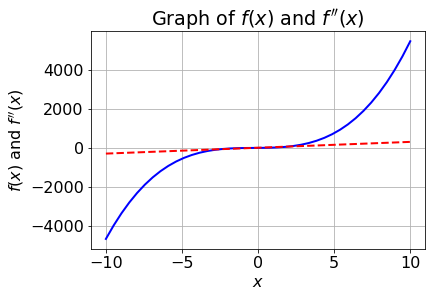

In [5]:
X = np.linspace(-10, 10, 40)                           # x
Y1 = [(lambda x: 5*x**3 + 4*x**2 + 6*x)(x) for x in X] # f(x)
Y2 = [(lambda x: 30*x + 8)(x) for x in X]              # f''(x)
plot(X,Y1,c='b',lw=2)
plot(X,Y2,c='r',lw=2,ls='dashed')
grid();xlabel('$x$');ylabel('$f(x)$ and $f\'\'(x)$')
title('Graph of $f(x)$ and $f\'\'(x)$');

We know the inflection point is where $f''(x)=0$, therefore $30x+8=0$, which means that the inflection point is at $x=-\frac{8}{30}$.

Now we will test if the second derivative is positive/negative on each side of the inflection point:

 * $f''(-5) = -142 \rightarrow f$ is concave at $x=-5$.
 * $f''(5) = 156 \rightarrow f$ is convex at $x=5$.
 
Because we know the inflection point, we now know that $f$ is convex on the interval $\left[-\frac{8}{30}, \rightarrow\right>$. In a similar way, we also know that $f$ is concave on the interval $\left<\leftarrow, -\frac{8}{30}\right]$.

# Two variable convexity/concavity test

We can also test for convexity/concavity for two variable functions. If we look at an example function $f(x,y)=x^2+xy+y^2$, we can clearly see that it is strictly convex.

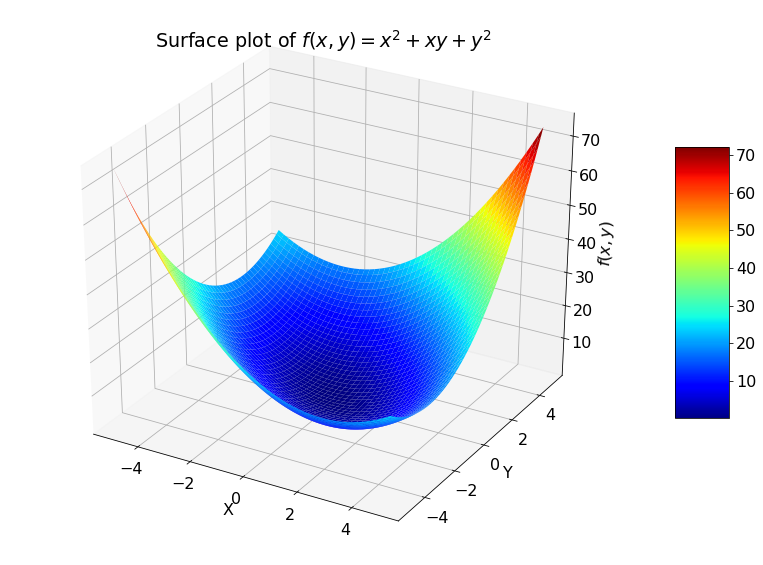

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
xs = ys = np.arange(-5, 5, .05)
X, Y = np.meshgrid(xs, ys)
zs = np.array([(lambda x, y: x**2 + x*y + y**2)(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)   
xlabel('X');ylabel('Y');ax.set_zlabel('$f(x,y)$')
title('Surface plot of $f(x,y)=x^2+xy+y^2$');

## Method for functions of two variables

To determine if $f(x,y)$ is concave or convex, we need to find the following four quantities:

* $\dfrac{\partial^2 f(x,y)}{\partial x^2}$ : The second partial derivative of $f(x,y)$ with respect to $x$.
* $\dfrac{\partial^2 f(x,y)}{\partial y^2}$ : The second partial derivative of $f(x,y)$ with respect to $y$.
* $\dfrac{\partial^2 f(x,y)}{\partial x \partial y}$ : The first partial with respect to $x$, and the second partial with respect to $y$.
* $\dfrac{\partial^2 f(x,y)}{\partial y \partial x}$ : The first partial with respect to $y$, and the second partial with respect to $x$.

It is important to note that if we first take the partial with respect to $x$ and then with respect to $y$, we will get the same as if we first take it with respect to $y$ and the with respect to $x$. This means that $\dfrac{\partial^2 f(x,y)}{\partial x \partial y}$ is the same as $\dfrac{\partial^2 f(x,y)}{\partial y \partial x}$. Therefore it is sufficient to find one of them, and squaring them to get $\left[\dfrac{\partial^2 f(x,y)}{\partial x \partial y}\right]^2$. 

After we have found the quantities, we can compare them in the following table to see if $f(x,y)$ is convex/concave, or none at all:

|Quantity|Convex|Strictly convex|Concave|Strictly concave|
|-|-|-|-|-|
|$\dfrac{\partial^2 f(x,y)}{\partial x^2} \cdot \dfrac{\partial^2 f(x,y)}{\partial y^2} - \left[ \dfrac{\partial^2 f(x,y)}{\partial x \partial y} \right]^2$|$\geq 0$|$>0$|$\geq 0$|$> 0$|
|$\dfrac{\partial^2 f(x,y)}{\partial x^2}$ |$\geq 0$|$>0$|$\leq 0$|$< 0$|
|$\dfrac{\partial^2 f(x,y)}{\partial y^2}$ |$\geq 0$|$>0$|$\leq 0$|$< 0$|

A quick way to determine if a function is convex or concave, is by finding the quantities in the following matrix:

$$ M = \begin{bmatrix} \dfrac{\partial^2 f(x,y)}{\partial x^2} & \dfrac{\partial^2 f(x,y)}{\partial x \partial y} \\ \dfrac{\partial^2 f(x,y)}{\partial y^2} & \dfrac{\partial^2 f(x,y)}{\partial y \partial x}  \end{bmatrix} $$

If $f(x,y)$ is convex/concave, this means that $\textrm{det}(M) \geq 0$. If we remember that $\text{det}(M) = \dfrac{1}{ad-bc}$, we can see that the $\textrm{det}(M)$ becomes:

$$ \dfrac{1}{\dfrac{\partial^2 f(x,y)}{\partial x^2} \cdot \dfrac{\partial^2 f(x,y)}{\partial y^2} - \dfrac{\partial^2 f(x,y)}{\partial x \partial y} \cdot \dfrac{\partial^2 f(x,y)}{\partial y \partial x} } \geq 0 $$

But if we recall that $\dfrac{\partial^2 f(x,y)}{\partial x \partial y}$ is the same as $\dfrac{\partial^2 f(x,y)}{\partial y \partial x}$, we can rewrite it as:

$$ \dfrac{1}{\dfrac{\partial^2 f(x,y)}{\partial x^2} \cdot \dfrac{\partial^2 f(x,y)}{\partial y^2} - \left[\dfrac{\partial^2 f(x,y)}{\partial x \partial y}\right]^2  } \geq 0.$$

But because we only want to determine if the result is zero or positive, we can conclude that

$$ \dfrac{\partial^2 f(x,y)}{\partial x^2} \cdot \dfrac{\partial^2 f(x,y)}{\partial y^2} - \left[\dfrac{\partial^2 f(x,y)}{\partial x \partial y}\right]^2 \geq 0,$$

which is the quantity in the table.

## Example

Let $f(x,y)=x^2+xy+y^2$. We first determine the four quantities:

* $\dfrac{\partial^2 f(x,y)}{\partial x^2} = 2$.
* $\dfrac{\partial^2 f(x,y)}{\partial y^2} = 2$.
* $\dfrac{\partial^2 f(x,y)}{\partial x \partial y} = 1$.
* $\dfrac{\partial^2 f(x,y)}{\partial y \partial x} = 1$.

If we let $M=\begin{bmatrix} 2 && 1 \\ 1 && 2 \end{bmatrix}$ we find that $\textrm{det}(M)=\dfrac{1}{2\cdot2-1\cdot1} = \dfrac{1}{4-1} = \dfrac{1}{3}$. This means that the function is either convex or concave.

If we look at the table we can see that $\dfrac{\partial^2 f(x,y)}{\partial x^2} > 0$ and $\dfrac{\partial^2 f(x,y)}{\partial y^2} > 0$. This means that $f(x,y)$ is a strictly convex function.

# References

1. https://en.wikipedia.org/wiki/Convex_set
2. https://en.wikipedia.org/wiki/Convex_function
3. Introduction to Operations Research, Hillier/Lieberman, chapter 13.